<a href="https://colab.research.google.com/github/anw1998/MMD6020_Final_Project/blob/main/EEG_Seizure_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 6.6 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Exploration

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/chbmit_preprocessed_data.csv')

In [ ]:
data_df.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


In [ ]:
data_df.shape

(2097150, 24)

In [ ]:
df1 = data_df.sample(frac=0.1, random_state=666).reset_index(drop=True)

In [ ]:
df1

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000041,-1.390000e-05,-0.000002,-0.000005,0.000014,0.000018,1.950000e-07,0.000018,0.000031,0.000010,...,-2.050000e-05,-0.000048,0.000011,4.280000e-05,-0.000006,-0.000016,-4.240000e-05,-0.000013,-0.000013,0.0
1,-0.000080,-5.880000e-05,-0.000070,-0.000052,-0.000060,-0.000017,-5.920000e-05,0.000012,0.000011,0.000078,...,-3.340000e-05,-0.000012,0.000055,5.720000e-05,-0.000044,0.000011,-5.680000e-05,-0.000025,-0.000025,0.0
2,-0.000014,2.910000e-05,0.000053,0.000053,-0.000003,-0.000042,2.360000e-05,-0.000069,-0.000045,-0.000050,...,3.500000e-05,0.000060,0.000028,2.170000e-05,0.000040,0.000014,-2.130000e-05,0.000074,0.000074,0.0
3,-0.000029,-9.770000e-07,-0.000033,-0.000017,-0.000023,-0.000019,-2.790000e-05,-0.000013,-0.000046,-0.000019,...,-3.710000e-06,-0.000008,-0.000002,1.500000e-05,-0.000015,0.000013,-1.470000e-05,-0.000010,-0.000010,1.0
4,0.000138,3.810000e-05,-0.000156,-0.000085,-0.000004,0.000139,-3.730000e-05,-0.000013,0.000140,0.000097,...,-1.537480e-04,-0.000154,-0.000039,3.890000e-05,-0.000156,-0.000045,-3.850000e-05,-0.000032,-0.000032,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209710,0.000335,-5.490000e-05,-0.000040,-0.000020,0.000061,-0.000033,-2.018070e-04,0.000225,-0.000033,0.000014,...,-4.490000e-06,0.000032,-0.000064,1.006110e-04,0.000036,0.000052,-1.002200e-04,0.000014,0.000014,1.0
209711,-0.000015,1.370000e-06,-0.000004,0.000001,-0.000023,0.000006,-9.960000e-06,-0.000007,0.000003,-0.000027,...,-1.950000e-07,0.000003,0.000006,-1.950000e-07,0.000003,-0.000014,5.860000e-07,0.000007,0.000007,0.0
209712,-0.000043,-1.580000e-05,-0.000080,-0.000078,-0.000118,-0.000040,-9.510000e-05,0.000071,0.000090,0.000083,...,8.810000e-05,-0.000040,0.000104,-7.870000e-05,-0.000093,0.000123,7.910000e-05,-0.000189,-0.000189,1.0
209713,-0.000065,-6.230000e-05,-0.000008,-0.000014,0.000027,-0.000017,-4.200000e-05,-0.000026,-0.000121,-0.000085,...,6.150000e-05,0.000009,0.000030,1.660000e-05,0.000052,0.000013,-1.620000e-05,-0.000008,-0.000008,0.0


In [ ]:
df1[df1['Outcome'] == 0].shape

(105223, 24)

In [ ]:
df1[df1['Outcome'] == 1].shape

(104492, 24)

In [ ]:
y = df1['Outcome']
X = df1.drop(['Outcome'], axis=1)

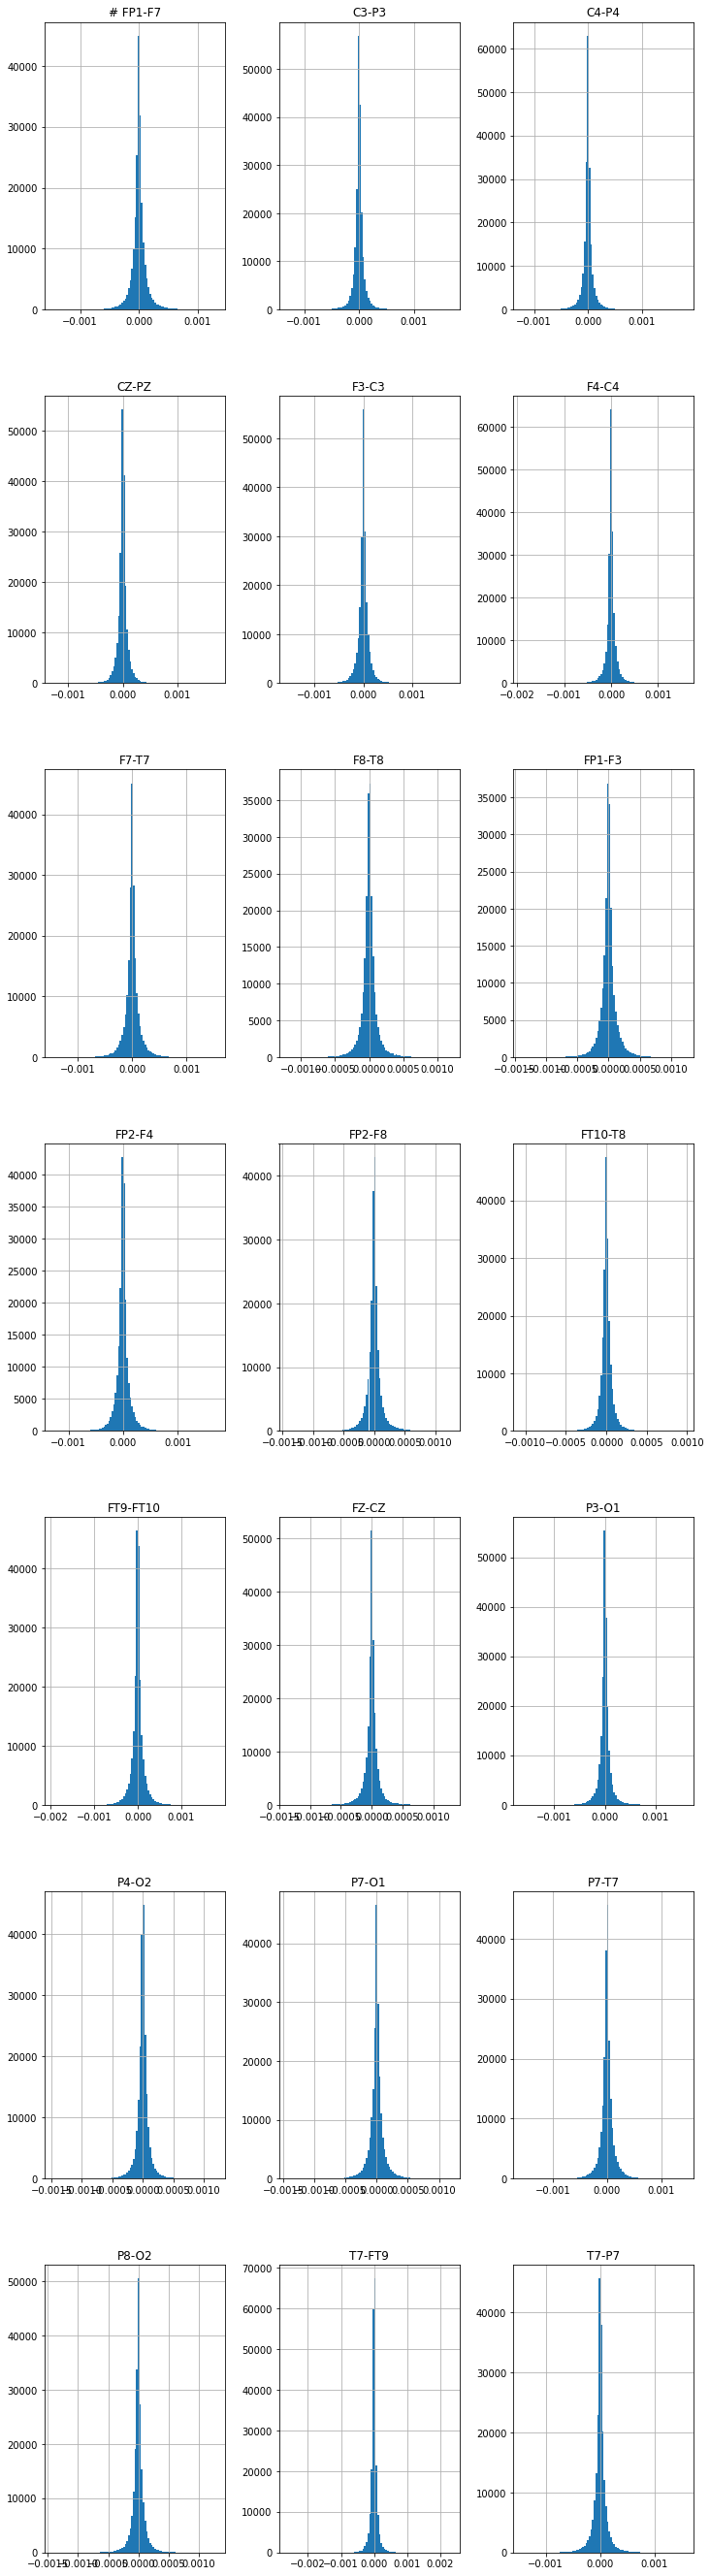

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(X.columns)//3, 3, figsize=(12, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        X.hist(column = X.columns[i], bins = 100, ax=axis)
        i = i+1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=666)

In [ ]:
X_test.shape

(41943, 23)

In [ ]:
from sklearn.svm import SVC
clf = SVC(verbose=1)

In [ ]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(verbose=1)

In [ ]:
clf.score(X_test, y_test)

0.8310325918508452

In [ ]:
import xgboost as xgb

In [ ]:
clf2 = xgb.XGBClassifier()

In [ ]:
clf2.fit(X_train, y_train)

XGBClassifier()

In [ ]:
clf2.score(X_test, y_test)

0.8028514889254464